# Classification model using KNN

### 1. Import libraries

In [1]:
import pandas as pd
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.spatial import distance
from sklearn import model_selection

### 2. Upload Clinic data

In [2]:
path ='../../../../Data_preprocessing/Prediction PFS/RNA+Clinic joined/New/Clinical_data_and_RNA_30_Features_PFS.csv'
data = pd.read_csv(path)
data.head()

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,RP11-96O20.4,RP5-827C21.1,RPS12P26,SDR42E1,SNORD113-5,TARBP2,TRAV41,TRIM43B,VN2R17P,XPC
0,0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,962.0,-16.406250,12.164384,0.766909,...,21.18753,27.40814,31.71139,30.26124,21.32743,29.60417,22.22154,21.9744,21.12857,32.24472
1,1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,67.0,0.0,0.0,2.0,254.0,-40.000000,5.490411,0.773269,...,21.18753,29.25015,29.15373,29.12730,21.32743,29.61188,22.22154,21.9744,21.12857,32.15619
2,2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,62.0,0.0,0.0,1.0,800.0,-89.436620,61.906849,1.782859,...,21.18753,23.03429,29.37858,27.22907,21.32743,31.90343,22.22154,21.9744,21.12857,31.86536
3,3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,60.0,0.0,0.0,3.0,790.0,11.787072,1.249315,5.890573,...,21.18753,23.03429,30.19136,22.83731,21.32743,30.35424,22.22154,21.9744,21.12857,31.63561
4,4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,76.0,0.0,0.0,2.0,1241.0,0.000000,5.654795,1.374775,...,21.18753,23.03429,31.82172,22.83731,21.32743,31.60946,22.22154,21.9744,21.12857,33.12717


In [3]:
data = data[['RNA_ID','ImmunoPhenotype_Desert','ImmunoPhenotype_Excluded','ImmunoPhenotype_Infiltrated','ImmunoPhenotype_NA','PFS','AC005307.1', 'ATP5G2P1', 'DLGAP4', 'EIF4A1P9', 'FAM172BP', 'FAM224A', 'GJA9', 'GPR155', 'GYPE', 'IL25', 'KLHL5', 'LANCL1-AS1', 'LEMD1', 'PCMT1', 'RP11-120J4.1', 'RP11-20G6.3', 'RP11-349G13.2', 'RP11-374M1.2', 'RP11-536C10.21', 'RP11-95G17.2', 'RP11-96O20.4', 'RP5-827C21.1', 'RPS12P26', 'SDR42E1', 'SNORD113-5', 'TARBP2', 'TRAV41', 'TRIM43B', 'VN2R17P', 'XPC']]
data.head()

,RNA_ID,ImmunoPhenotype_Desert,ImmunoPhenotype_Excluded,ImmunoPhenotype_Infiltrated,ImmunoPhenotype_NA,PFS,AC005307.1,ATP5G2P1,DLGAP4,EIF4A1P9,...,RP11-96O20.4,RP5-827C21.1,RPS12P26,SDR42E1,SNORD113-5,TARBP2,TRAV41,TRIM43B,VN2R17P,XPC
0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,0,0,1,0,12.164384,21.055379,21.300337,34.54982,21.37925,...,21.18753,27.40814,31.71139,30.26124,21.32743,29.60417,22.22154,21.9744,21.12857,32.24472
1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,0,0,1,0,5.490411,21.055379,21.300337,34.06647,21.37925,...,21.18753,29.25015,29.15373,29.12730,21.32743,29.61188,22.22154,21.9744,21.12857,32.15619
2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,0,0,1,0,61.906849,21.055379,21.300337,34.42561,25.08766,...,21.18753,23.03429,29.37858,27.22907,21.32743,31.90343,22.22154,21.9744,21.12857,31.86536
3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,0,1,0,0,1.249315,21.055379,21.300337,34.41176,26.76156,...,21.18753,23.03429,30.19136,22.83731,21.32743,30.35424,22.22154,21.9744,21.12857,31.63561
4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,0,0,0,1,5.654795,21.055379,21.300337,34.29088,21.37925,...,21.18753,23.03429,31.82172,22.83731,21.32743,31.60946,22.22154,21.9744,21.12857,33.12717


In [4]:
Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)

# As I won't need this columns any more, I deleted them.
data = data.drop('PFS', axis=1)
data = data.drop('RNA_ID', axis=1)

X = data.iloc[:,0:36] # I selected all the columns by removing the Unnamed column (row id) and the Target column.

print(X)
print('Numero de pacientes: ',len(Y))

     ImmunoPhenotype_Desert  ImmunoPhenotype_Excluded  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         1   
4                         0                         0   
..                      ...                       ...   
176                       0                         0   
177                       0                         0   
178                       0                         0   
179                       0                         0   
180                       0                         0   

     ImmunoPhenotype_Infiltrated  ImmunoPhenotype_NA  AC005307.1   ATP5G2P1  \
0                              1                   0   21.055379  21.300337   
1                              1                   0   21.055379  21.300337   
2                              1                   0   21.055379  21.300337   

### 3. Train-Test dataset split

In [5]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Study the best value for K

In [6]:
neighbors = list(range(1,8))
cek = []
list_accuracy = []
best_acuracy = 0
best_k = 0
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    pred = knn.fit(XTrain, yTrain).predict(XTest)
    if accuracy_score(yTest, pred) >= best_acuracy:
        best_k = k
        best_acuracy=accuracy_score(yTest, pred)
    list_accuracy.append(accuracy_score(yTest, pred))

print("Best accuracy is obtained with k = " + str(best_k)+ " and is: %.4f" % (best_acuracy))


Best accuracy is obtained with k = 4 and is: 0.7297


C:\Users\sandr\AppData\Local\Temp/ipykernel_16936/3738168230.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
C:\Users\sandr\AppData\Local\Temp/ipykernel_16936/3738168230.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(best_k, best_acuracy, 'ro', color ='g')


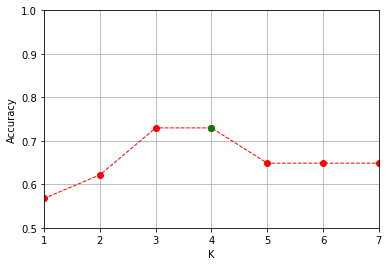

In [7]:
plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
# Green dot represent best K value
plt.plot(best_k, best_acuracy, 'ro', color ='g')
plt.axis([1, 7, 0.5, 1])
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.grid()
plt.show()

### 5. Best metric study (manhattan or euclidean)

In [8]:
# Estudio de la mejor métrica
from sklearn import neighbors
# Euclidean distance model
euclid_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.sqeuclidean)
euclid_model.fit(XTrain,yTrain) 

# Manhattan distance model
manhattan_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.cityblock) 
manhattan_model.fit(XTrain, yTrain)

KNeighborsClassifier(metric=<function cityblock at 0x00000276FF8DB280>,
                     n_neighbors=4)

In [9]:
manhattan_predictions = manhattan_model.predict(XTest)
euclid_predictions = euclid_model.predict(XTest) 
df = pd.DataFrame({'actual': yTest, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
0,0,1,0
1,1,1,1
2,0,1,1
3,1,1,1
4,0,0,0


In [10]:
# Cross validation
result1= model_selection.cross_val_score(euclid_model, XTrain, yTrain, cv=5, scoring='accuracy')
result2 = model_selection.cross_val_score(manhattan_model, XTrain, yTrain, cv=5, scoring='accuracy')
print("Best result of the cross validation of the model (euclidean) with the best paramters: " +str(np.mean(result1)))
print("Best result of the cross validation of the model (mahattan) with the best paramters:: " +str(np.mean(result2)))


Best result of the cross validation of the model (euclidean) with the best paramters: 0.6665024630541873
Best result of the cross validation of the model (mahattan) with the best paramters:: 0.5913793103448276


#### 6.1. Manhattan model

In [11]:
# Making predictions with the optimal model on the training dataset
yhatTrain = manhattan_model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [12]:
# Making predictions with the optimal model on the test dataset
mayhatTest = manhattan_model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (mayhatTest[i] == yTest[i]):
        contTest = contTest + 1

In [13]:
print('Final accuracy on the training dataset (manhattan): ' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset (manhattan): ' + str(contTest/len(yTest)))

Final accuracy on the training dataset (manhattan): 0.7916666666666666
Final accuracy on the testing dataset (manhattan): 0.6486486486486487


In [14]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[55 13]
 [17 59]]
Input data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1
 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0
 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0
 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1]


In [15]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        68
           1       0.82      0.78      0.80        76

    accuracy                           0.79       144
   macro avg       0.79      0.79      0.79       144
weighted avg       0.79      0.79      0.79       144



In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yTest, mayhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(mayhatTest))

----------------Confusion Matrix (Test)------------------
[[ 9  8]
 [ 5 15]]
Input data:  [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0]
Prediction:        [1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0]


In [17]:
print(classification_report(yTest, mayhatTest))

              precision    recall  f1-score   support

           0       0.64      0.53      0.58        17
           1       0.65      0.75      0.70        20

    accuracy                           0.65        37
   macro avg       0.65      0.64      0.64        37
weighted avg       0.65      0.65      0.64        37

